### **Correlation Between Temperature(Environmental Factors) and Athlete Performance Metrics**

### Clean and Preprocess the dataset

In [1]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
# data = pd.read_csv("C:/Users/wiman/redback-fit-sports-performance/Running Analysis/activities_cleaned.csv")
data = pd.read_csv("/content/activities_cleaned.csv")
data.head()

,Activity ID,Activity Type,Begin Timestamp,End Timestamp,Max. Elevation (Raw),Min. Elevation (Raw),Elevation Gain (Raw),Elevation Loss (Raw),Average Heart Rate (bpm),Max. Heart Rate (bpm).1,...,Begin Latitude (Decimal Degrees Raw),Begin Longitude (Decimal Degrees Raw),End Latitude (Decimal Degrees Raw),End Longitude (Decimal Degrees Raw),Temperature (Raw),Wind Speed (Raw),Wind Direction,Humidity (Raw),Condition,Rainfall
0,2284658991,Running,4/11/2017 12:07,4/11/2017 13:06,472.6,472.6,315.0,314.0,182,113,...,48.019178,7.856356,48.019369,7.855831,13.9,11,S,77,fair,no
1,2284658936,Running,3/11/2017 9:47,3/11/2017 10:35,473.2,473.2,245.0,244.0,177,100,...,48.017859,7.881881,48.019410,7.855922,11.1,3,N,100,fair,no
2,2228102647,Running,25/10/2017 16:31,25/10/2017 17:11,278.8,278.8,208.0,272.0,179,95,...,48.018396,7.880602,48.019329,7.855921,20.0,6,SSW,60,fair,no
3,2104984694,Running,13/10/2017 11:53,13/10/2017 12:41,471.6,471.6,246.0,244.0,180,109,...,48.019194,7.856334,48.019312,7.855894,17.2,5,SSO,72,fair,no
4,2084195352,Running,2/10/2017 14:51,2/10/2017 15:38,494.6,494.6,246.0,240.0,174,110,...,48.019116,7.857145,48.019371,7.856066,17.8,19,SW,77,mostly cloudy,no


In [2]:
# number of rows and columns
data.shape

(155, 28)

In [3]:
# make a new copy of the dataset
new_data = data.copy()
# extract relevant features
new_data = new_data[['Elevation Gain (Raw)','Elevation Loss (Raw)','Average Heart Rate (bpm)','Average Speed','Distance (Raw)',
'Moving Duration (h:m:s)','Calories','Temperature (Raw)','Wind Speed (Raw)','Humidity (Raw)']]
# rename columns
new_data.rename(columns={'Elevation Gain (Raw)':'Elevation_Gain','Elevation Loss (Raw)':'Elevation_Loss','Average Heart Rate (bpm)':'Average_Heart_Rate','Distance (Raw)':'Distance',
'Moving Duration (h:m:s)':'Moving_Duration','Temperature (Raw)':'Temperature','Wind Speed (Raw)':'Wind_Speed','Humidity (Raw)':'Humidity'}, inplace=True)
new_data.head()

,Elevation_Gain,Elevation_Loss,Average_Heart_Rate,Average Speed,Distance,Moving_Duration,Calories,Temperature,Wind_Speed,Humidity
0,315.0,314.0,182,6:47,8.66881,0:58:50,753,13.9,11,77
1,245.0,244.0,177,6:18,7.62835,0:48:02,626,11.1,3,100
2,208.0,272.0,179,5:52,6.60755,0:38:44,528,20.0,6,60
3,246.0,244.0,180,6:11,7.75709,0:47:57,661,17.2,5,72
4,246.0,240.0,174,6:01,7.81321,0:47:04,619,17.8,19,77


In [4]:
# convert time format from h:m:s to s(seconds)
new_data['Moving_Duration_s'] = pd.to_timedelta(new_data['Moving_Duration']).dt.total_seconds()
# drop the previous column and replace the new one
new_data.drop(columns='Moving_Duration', inplace=True)
# convert calories to float datatype
new_data['Calories'] = pd.to_numeric(new_data['Calories'], errors='coerce')

In [5]:
# convert average speed column to kmh
# assuming that the pace is given in the average speed column
# convert pace to speed
new_data[['min','sec']] = new_data['Average Speed'].str.split(':',expand=True).astype(float)
new_data['pace'] = new_data['min'] + new_data['sec'] /60
new_data['Average_Speed_kmh'] = 60/new_data['pace']
# clean up the dataset
new_data.drop(columns=['Average Speed','min','sec','pace'], inplace=True)

In [6]:
new_data.head()

,Elevation_Gain,Elevation_Loss,Average_Heart_Rate,Distance,Calories,Temperature,Wind_Speed,Humidity,Moving_Duration_s,Average_Speed_kmh
0,315.0,314.0,182,8.66881,753.0,13.9,11,77,3530.0,8.845209
1,245.0,244.0,177,7.62835,626.0,11.1,3,100,2882.0,9.523810
2,208.0,272.0,179,6.60755,528.0,20.0,6,60,2324.0,10.227273
3,246.0,244.0,180,7.75709,661.0,17.2,5,72,2877.0,9.703504
4,246.0,240.0,174,7.81321,619.0,17.8,19,77,2824.0,9.972299


In [7]:
new_data.dtypes # all the features are numerical

,0
Elevation_Gain,float64
Elevation_Loss,float64
Average_Heart_Rate,int64
Distance,float64
Calories,float64
Temperature,float64
Wind_Speed,int64
Humidity,int64
Moving_Duration_s,float64
Average_Speed_kmh,float64


In [8]:
# check for null values
new_data.isnull().sum()

,0
Elevation_Gain,0
Elevation_Loss,0
Average_Heart_Rate,0
Distance,0
Calories,4
Temperature,0
Wind_Speed,0
Humidity,0
Moving_Duration_s,0
Average_Speed_kmh,0


In [9]:
# fill null values in the 'calories' column by its mean or median based on the skewness
skewness = new_data['Calories'].skew()
if np.abs(skewness) < 0.5:
    value = new_data['Calories'].mean()
else:
    value = new_data['Calories'].median()

new_data["Calories"].fillna(value)

,Calories
0,753.0
1,626.0
2,528.0
3,661.0
4,619.0
...,...
150,308.0
151,386.0
152,287.0
153,351.0


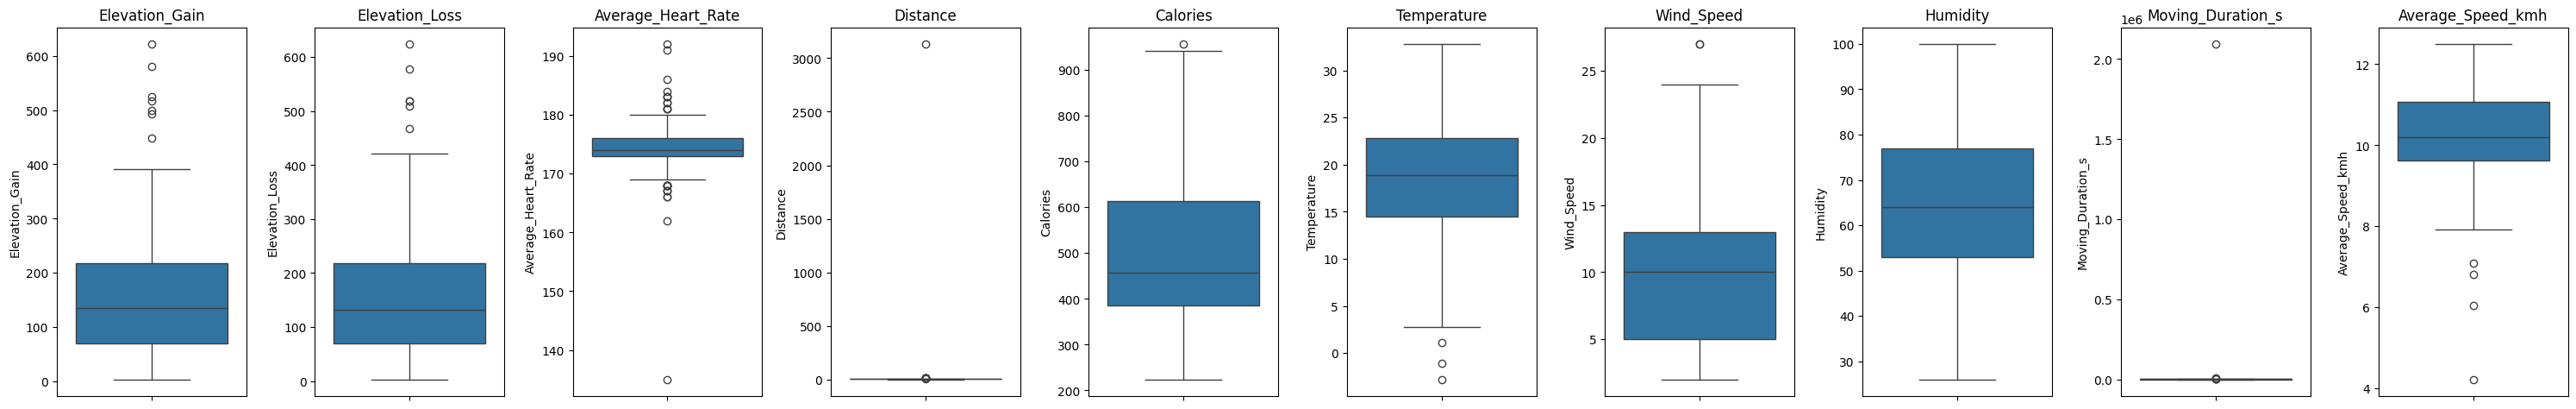

In [10]:
# check for the outliers
numeric_col = new_data.columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_col), figsize=(3*len(numeric_col),5))
for i,col in enumerate(numeric_col):
    sns.boxplot(y=new_data[col],ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

There are some unusual values in the dataset particularly in Distance, Moving Duration features. These data points are removed by using IQR.  

In [11]:
# remove extreme outliers from following features
# have used 3 instead of 1.5 as the multiplier
columns = new_data.columns
# calculate IQR for both features using for loop
for col in columns:
    Q1 = new_data[col].quantile(0.25)
    Q3 = new_data[col].quantile(0.75)
    IQR = Q3-Q1
    lower_boundry = Q1 - 3 * IQR
    upper_boundry = Q3 + 3 * IQR
    # remain values, which is higher than the lower boundary and lower than the upper boundary
    new_data = new_data[(new_data[col] >= lower_boundry) & (new_data[col] <= upper_boundry)]

In [12]:
new_data.shape

(142, 10)

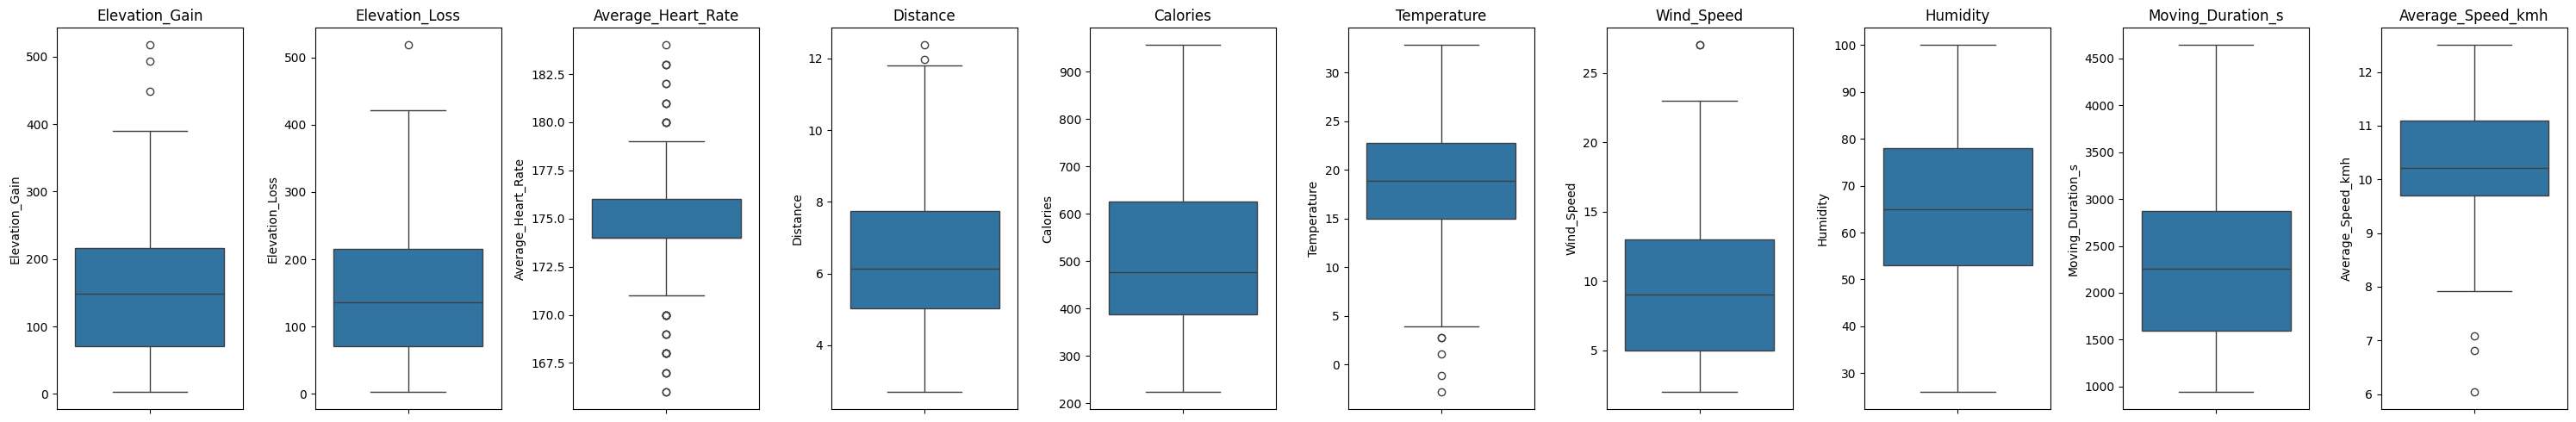

In [13]:
# again check for the outliers
numeric_col = new_data.columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_col), figsize=(3*len(numeric_col),5))
for i,col in enumerate(numeric_col):
    sns.boxplot(y=new_data[col],ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [14]:
# standardised the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_new_data = scaler.fit_transform(new_data)

### Correlate Temperature and Athlete Perfromance Metrics

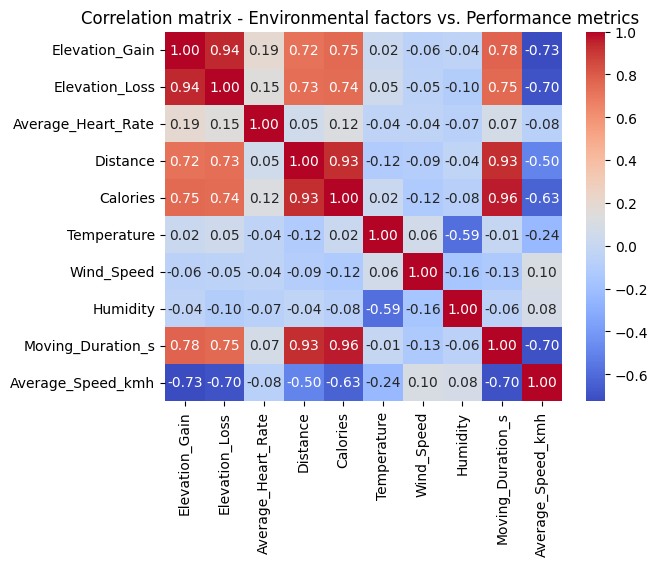

In [15]:
# convert back to dataframe
scaled_data = pd.DataFrame(scaled_new_data, columns=new_data.columns)

# find the correlation using heatmap
# used spearman correlation due to non-normality and outliers
corr_matrix = scaled_data.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix - Environmental factors vs. Performance metrics ')
plt.show()

Here, I have particulalry focused on temperature to observe the relationship with athlete performance metric. Based on the heatmap, temperature has weak relationship with performance.

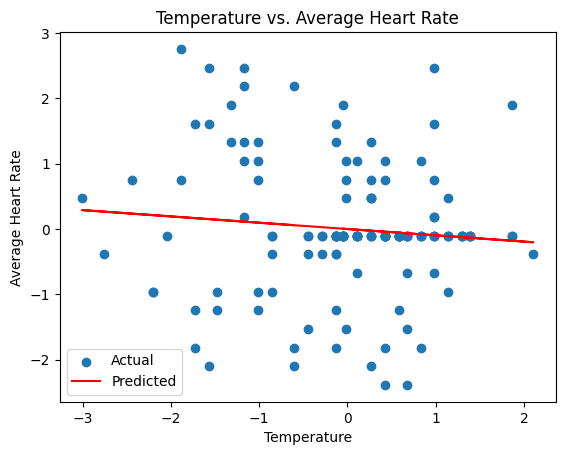

In [16]:
# Relationship between temperature and average heart rate
from  sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(scaled_data[['Temperature']],scaled_data['Average_Heart_Rate'])

y_pred = model.predict(scaled_data[['Temperature']])

plt.scatter(scaled_data[['Temperature']],scaled_data['Average_Heart_Rate'], label='Actual')
plt.plot(scaled_data[['Temperature']],y_pred, color='red', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Average Heart Rate')
plt.title('Temperature vs. Average Heart Rate')
plt.legend()
plt.show()

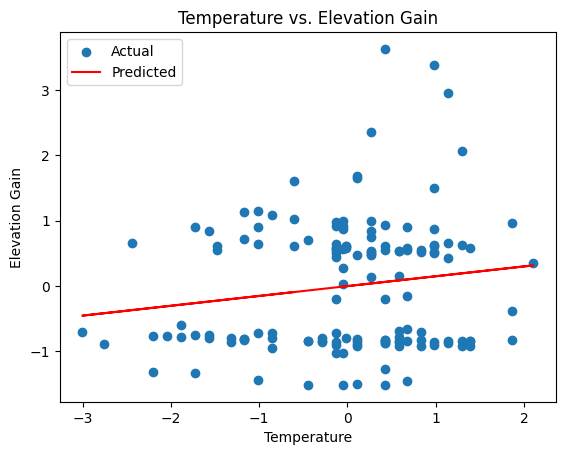

In [59]:
# Relationship between temperature and elevation loss
model.fit(scaled_data[['Temperature']],scaled_data['Elevation_Gain'])

y_pred1 = model.predict(scaled_data[['Temperature']])

plt.scatter(scaled_data[['Temperature']],scaled_data['Elevation_Gain'], label='Actual')
plt.plot(scaled_data[['Temperature']],y_pred1, color='red', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Elevation Gain')
plt.title('Temperature vs. Elevation Gain')
plt.legend()
plt.show()

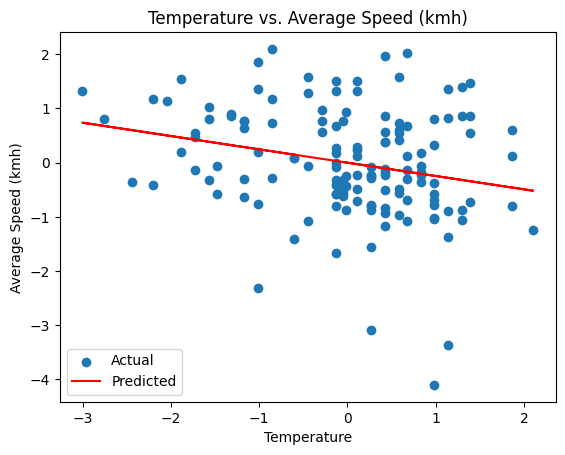

In [60]:
# Relationship between temperature and average speed (kmh)
model.fit(scaled_data[['Temperature']],scaled_data['Average_Speed_kmh'])

y_pred2 = model.predict(scaled_data[['Temperature']])

plt.scatter(scaled_data[['Temperature']],scaled_data['Average_Speed_kmh'], label='Actual')
plt.plot(scaled_data[['Temperature']],y_pred2, color='red', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Average Speed (kmh)')
plt.title('Temperature vs. Average Speed (kmh)')
plt.legend()
plt.show()

According to the above plots,
1.   The average heart rate shows a negative relationship with temperature, showing tendency to decrease as temperature arise. However, there is no clear linear relationship between variables.
2.   There is a very low positive correlation between the temperature and elevation loss, indicating the elevation loss decreases slightly as temperature gets warmer.
3.   And also, average speed tends to decrease as temperature increases.

### **XGBoost Regression Model**

The XGBoost Regression Model performs to identify any non-linear relationship between environmental factors and athlete performance metrics.

In [70]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# environmental factors
x = new_data[['Temperature', 'Wind_Speed', 'Humidity']]
# athlete performance
Y = new_data[['Elevation_Loss','Elevation_Gain','Average_Heart_Rate','Distance','Calories','Moving_Duration_s','Average_Speed_kmh']]

In [71]:
# find the best hyperparameters for the model
from sklearn.model_selection import GridSearchCV
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# combinations of parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror'),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

In [72]:
# build-up the model based on the best hyper parameters
result = {}

for target in Y.columns:
  y = Y[target]
  # split the data into training and testing
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

  # initialise the model
  model = xgb.XGBRegressor(
      objective = 'reg:squarederror',
      n_estimators = 100,
      learning_rate = 0.01,
      max_depth = 3,
      random_state = 42
  )
  # perform cross-validation
  scores = np.round(cross_val_score(model, x_train, y_train, cv=5, scoring='r2'),3)

  # fit the model
  model.fit(x_train, y_train)
  # predict on the test data
  y_pred = model.predict(x_test)
  # evaluate the model
  mse = round(mean_squared_error(y_test, y_pred),3)
  r2 = round(r2_score(y_test, y_pred),3)

  result[target] = {
      'Cross_Validation R2 score':scores,
      'Mean Cross-Validation R2 score':scores.mean(),
      'Mean Squared Error': mse,
      'R-squared': r2
  }

# print the result
results = pd.DataFrame(result).T
results


,Cross_Validation R2 score,Mean Cross-Validation R2 score,Mean Squared Error,R-squared
Elevation_Loss,"[-0.064, -0.137, -0.168, -0.354, -0.11]",-0.1666,10069.682,-0.164
Elevation_Gain,"[0.015, -0.075, -0.155, -0.276, -0.034]",-0.105,10949.69,-0.223
Average_Heart_Rate,"[-0.257, 0.022, -0.027, -0.354, -0.325]",-0.1882,14.216,-0.375
Distance,"[0.093, 0.033, 0.081, -0.856, 0.014]",-0.127,4.073,0.057
Calories,"[0.075, 0.05, 0.044, -0.626, 0.05]",-0.0814,25828.373,0.011
Moving_Duration_s,"[0.004, 0.002, -0.012, -0.733, -0.012]",-0.1502,802042.468,-0.014
Average_Speed_kmh,"[-0.141, -0.294, -0.436, 0.255, -0.076]",-0.1384,1.284,-0.039


According to the results, the low or negative R2 scores are expected because of the non-linear nature of the dataset. This suggests that the environmnetal factors have limited influence on the athlete's performance.

### **Summary of Findings**

*   **Dataset** - activities_cleaned.csv from the running activities.
*   **Method** - Performed the pearson correlation analysis to find and evaluate the linear relationship between environmnetal factors and athlete performance metrics.
*   **Data Preprocessing** - Removed extreme unusual entries from the dataset. Resulting in 142 entries. Focused on a subset of ten relevant features out of 28.
*   **Results** - Observed very weak relationship between the environmental factors and selected athlete performance metrics.

    XGBoost Regression model is performed to explore the non-linear relationship between the environmnetal factors and the athlete performance metrics. The model showed low and negative R2 scores, indicating the environmental factors can't explain much variance in athlete's performance.



